In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
sns.set()
import os

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 999

In [3]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

print ('설정 파일 위치: ', mpl.matplotlib_fname())
# path = 'c:\\windows\\Fonts\\NanumBarunGothic.ttf'
path = 'C:\\Users\\sc82choi\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'

font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'
fontprop = fm.FontProperties(fname=path, size=18)

설정 파일 위치:  C:\Users\sc82choi\Miniconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [4]:
DATA_PATH = "data"
file_list = [filename for filename in os.listdir(DATA_PATH) if "t" in filename ][1:]
df_list = [pd.read_csv(os.path.join(DATA_PATH, filename)) for filename in file_list]

number_of_train = len(df_list[0])
number_of_test = len(df_list[1])

C:\Users\sc82choi\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
df = pd.concat(df_list).reset_index(drop=True)
df["fr_yn"].replace({"Y":1 , "N":0}, inplace=True)
Y = df.pop("fr_yn")
y_train = Y[:number_of_train]
y_test = Y[number_of_train:]

In [16]:
gas_enery_col_list = [col_name for col_name in df.columns.tolist() if "gas_engry" in col_name]
ele_enery_col_list = [col_name for col_name in df.columns.tolist() if "ele_engry" in col_name]
lw_col_list = [col_name for col_name in df.columns.tolist() if "lw_" in col_name]
all_col_list = df.columns.tolist()


In [17]:
gas_enery_df = df[ele_enery_col_list]
ele_engry_df = df[gas_enery_col_list]
lw_df = df[lw_col_list]

general_col_list = list(
    set(all_col_list) - set(["id"]+ele_enery_col_list + gas_enery_col_list + lw_col_list))

In [ ]:
int_cols = ["bldng_cnt",
"ttl_grnd_flr",
"ttl_dwn_fr",
"hm_cnt",
"cctv_in_100m",
"fr_wthr_fclt_in_100m"]

In [20]:
int_cols = ["bldng_cnt", 
            "ttl_grnd_flr", 
            "ttl_dwn_flr", "hm_cnt", "cctv_in_100m", "fr_wthr_fclt_in_100m"]
for col in int_cols:
    print("Column name : {}, column unique count: {}".format(col, len(df[col].unique())))
    print("Null count : {}".format(df[col].isnull().sum()))
    print(df[col].unique())
    df[col] = df[col].astype(float)
    print()

Column name : bldng_cnt, column unique count: 96
Null count : 0
[  3   1   2   6   8   4   9   5  20   7  12  10  14  11  26  22  17  18
  19  23  29  13  15  32  25  33  64  55  43  27  16  53  21 110  44  42
  40  31  59  30  36  37  68  28  41  35 167  69  51  39 115  47  38  24
  85  45 125  54  50 132 174  93 223  34 111  49 705  57  99  62 138  65
 113  61 133  60  46  56  63  52  48 114  83  77  94 156 148 117 210 139
 122 315  71  75 321  79]

Column name : ttl_grnd_flr, column unique count: 231
Null count : 11005
[  1.   5.  nan   2.  17.   3.   4.   0.   7.   6.  14.  22.   8.  18.
  75. 285. 105.  10.  71.   9.  62.  59. 123.  77.  12.  16. 331.  30.
  25.  15.  11.  44.  29.  41.  27.  88. 209.  20.  26.  13. 242. 139.
  92. 210.  80.  76.  81.  87. 121. 351.  55. 124. 178.  68. 103.  23.
  28. 152. 244.  50.  47. 274. 333.  33.  49. 303. 112.  60. 156.  97.
  32.  93. 312.  89. 386. 127.  19.  91.  69. 253. 180. 343.  21. 109.
  86. 194.  64. 182. 440. 142. 594.  34.  85. 

In [8]:
float_cols = ["lnd_ar", "tmprtr","prcpttn","wnd_spd","wnd_drctn",
"hmdt","fr_sttn_dstnc","bldng_ar_prc","fr_wthr_fclt_dstnc","fr_mn_cnt",
"cctv_dstnc","tbc_rtl_str_dstnc","sft_emrgnc_bll_dstnc","ahsm_dstnc","no_tbc_zn_dstnc",
             "bldng_ar","ttl_ar"]
for col in float_cols:
    print("Column name : {}, column count: {}".format(col, len(df[col].unique())))
    print(df[col].unique())
    df[col] = df[col].astype(float)
    print()

Column name : lnd_ar, column count: 9700
[   0.   1446.    486.   ... 6184.   2283.7   583.86]

Column name : tmprtr, column count: 505
[ 10.7  19.5  15.5  20.6  12.7  27.8  20.9   5.8   2.1  -2.8   0.1  -3.1
  31.8  10.3  24.6  16.8   6.2   9.6  24.8  24.5  35.5  23.    9.8   2.2
   7.3  -4.   23.6  10.1   nan  14.2   5.2  20.7  24.    4.5  13.3   5.3
  19.2  22.4  25.1  30.3  20.3   0.9  10.5   7.5  21.   11.6  -1.5  22.6
   5.4  22.7  19.3  17.1   7.6   4.1   5.1  -2.9  -2.7  16.2  -2.4   3.8
  14.3  -1.    5.9  -3.   15.2  13.9  19.8  30.4  30.   22.   24.7  -5.1
  16.9  -3.4  -3.5  21.6  27.5   2.5   0.5  31.2  -0.7  25.7  21.1  19.1
   3.    8.    1.5  -4.4  17.8  21.9  25.5  10.6  21.5  22.1  19.9  22.9
  32.2  14.5   6.6  26.2  -2.   29.2   8.1   7.8   2.3  -2.3   9.9  28.6
  20.2   9.    7.2   6.3  25.    5.6  12.2  15.   25.4   2.   25.2   8.8
  27.4  19.4  26.6  18.1  17.4   9.1  20.4   1.    3.9  20.1  23.3   0.
   3.6   1.1  -3.7  13.    1.7   9.7  18.9  -6.6  33.9  28.7  

In [9]:
category_cols = ["bldng_us",
"bldng_archtctr","bldng_us_clssfctn","jmk","rgnl_ar_nm","rgnl_ar_nm2","lnd_us_sttn_nm","rd_sd_nm","trgt_crtr"]
for col in category_cols:
    print("Column name : {}, column count: {}".format(col, len(df[col].unique())))
    print(df[col].unique())
    df[col] = df[col].astype(object)
    print()

Column name : bldng_us, column count: 35
['단독주택' nan '공동주택' '종교시설' '공장' '제1종근린생활시설' '숙박시설' '동.식물 관련시설' '창고시설'
 '제2종근린생활시설' '문화및집회시설' '자동차관련시설' '업무시설' '판매시설' '교육연구시설' '분뇨.쓰레기처리시설'
 '수련시설' '의료시설' '노유자시설' '운동시설' '위락시설' '위험물저장및처리시설' '공공용시설' '교정및군사시설'
 '교육연구및복지시설' '장례식장' '운수시설' '관광휴게시설' '근린생활시설' '시장' '방송통신시설' '묘지관련시설' '발전시설'
 '판매및영업시설' '파출소']

Column name : bldng_archtctr, column count: 19
['블록구조' nan '철근콘크리트구조' '일반목구조' '벽돌구조' '경량철골구조' '일반철골구조' '철골콘크리트구조' '통나무구조'
 '강파이프구조' '목구조' '석구조' '조적구조' '기타강구조' '철골철근콘크리트구조' '기타구조' '기타조적구조'
 '프리케스트콘크리트구조' '기타콘크리트구조']

Column name : bldng_us_clssfctn, column count: 8
['주거용' nan '상업용' '문교사회용' '공업용' '농수산용' '기타' '공공용']

Column name : jmk, column count: 26
['대' '답' '임' '종' '장' '전' '잡' '목' '도' '천' '양' '구' '과' '체' '창' '학' '원' '공'
 '유' '수' '주' '철' '묘' '제' '차' '사']

Column name : rgnl_ar_nm, column count: 24
['자연녹지지역' '계획관리지역' '제2종일반주거지역' '제1종일반주거지역' '자연환경보전지역' '보전관리지역' '일반상업지역'
 '생산관리지역' '준주거지역' '생산녹지지역' '농림지역' nan '준공업지역' '일반공업지역' '근린상업지역'
 '제1종전용주거지역' '개발제한구역

In [10]:
boolen_cols = ["fr_fghtng_fclt_spcl_css_5_yn","fr_fghtng_fclt_spcl_css_6_yn",
"us_yn","dngrs_thng_yn","slf_fr_brgd_yn","blk_dngrs_thng_mnfctr_yn",
"cltrl_hrtg_yn","mlt_us_yn",]
for col in boolen_cols:
    print("Column name : {}, column count: {}".format(col, len(df[col].unique())))
    print(df[col].unique())
    df[col] = df[col].astype(object)
    print()

Column name : fr_fghtng_fclt_spcl_css_5_yn, column count: 2
[nan 'N']

Column name : fr_fghtng_fclt_spcl_css_6_yn, column count: 2
[nan 'N']

Column name : us_yn, column count: 4
[nan 'Y' 'N' 'T']

Column name : dngrs_thng_yn, column count: 3
[nan 'N' 'Y']

Column name : slf_fr_brgd_yn, column count: 2
[nan 'N']

Column name : blk_dngrs_thng_mnfctr_yn, column count: 3
[nan 'N' 'Y']

Column name : cltrl_hrtg_yn, column count: 3
[nan 'N' 'Y']

Column name : mlt_us_yn, column count: 2
['N' 'Y']



In [11]:
boolean_code = {'Y':1, 'N':0, 'T':99}
for col in boolen_cols:
    df[col] = df[col].replace(boolean_code)


In [36]:
def athrztn_date_handler(x):
    if x == 0:
        return "19000101"
    if x=="nan":
        return "19000101"
    value = x.split(".")[0] 
    error_code = {'9800808':'19800808', '1890010':'18900101',
                  '9900712':'19990712', '9990624':'19990624',
                  '9820930':'19820930', '9780421':'19780421', 
                  '1994000':'19940101', "1980808": "19800808",
                 "19979908":"19970908","20022 27":"20020227",
                  "16460101":"18000101","971215":"19971215",
                  "19941131":"19941130"
                 }   
    if value in error_code.keys():    
        return error_code[value]

    if value == "19791000":
        return "19791001"
    if value == "19150200":
        return "19150201"
    if len(value) == 4:
        return value + "0101"
    if value.endswith("0000"):
        return value[:4] + "0101"
    if value.endswith("00"):
        return value[:6] + "01"
    if len(value) == 8:
        return value
    if len(value) == 6:
        return value + "01" 
    return value

In [37]:
df["dt_of_fr"]
df["dt_of_athrztn"].map(str)

0            1977.0
1          19000101
2        20001104.0
3            1936.0
4          19000101
            ...    
66092      19000101
66093    20070221.0
66094    20000906.0
66095    19930831.0
66096    20030225.0
Name: dt_of_athrztn, Length: 66097, dtype: object

In [38]:
df["dt_of_fr"]

0        2017-10-20 05:54
1        2018-09-30 08:26
2        2016-10-30 14:57
3        2016-06-14 05:23
4        2018-04-22 05:38
               ...       
66092    2017-11-09 17:00
66093    2014-03-25 16:52
66094    2017-07-07 14:12
66095    2018-12-09 08:13
66096    2018-11-22 04:31
Name: dt_of_fr, Length: 66097, dtype: object

In [39]:
df["dt_of_fr"] = pd.to_datetime(df["dt_of_fr"], format="%Y-%m-%d %H:%M")

In [40]:
# "dt_of_athrztn"
df["dt_of_athrztn"].fillna("19000101", inplace=True)
df["dt_of_athrztn"] = df["dt_of_athrztn"].astype(str)

In [41]:
def athrztn_date_handler(x):
    if x == 0:
        return "19000101"
    if x=="nan":
        return "19000101"
    value = x.split(".")[0] 
    error_code = {'9800808':'19800808', '1890010':'18900101',
                  '9900712':'19990712', '9990624':'19990624',
                  '9820930':'19820930', '9780421':'19780421', 
                  '1994000':'19940101', "1980808": "19800808",
                 "19979908":"19970908","20022 27":"20020227",
                  "16460101":"18000101","971215":"19971215",
                  "19941131":"19941130"
                 }   
    if value in error_code.keys():    
        return error_code[value]

    if value == "19791000":
        return "19791001"
    if value == "19150200":
        return "19150201"
    if len(value) == 4:
        return value + "0101"
    if value.endswith("0000"):
        return value[:4] + "0101"
    if value.endswith("00"):
        return value[:6] + "01"
    if len(value) == 8:
        return value
    if len(value) == 6:
        return value + "01" 
    return value

In [42]:
df["dt_of_athrztn_conveted"] = pd.to_datetime(df["dt_of_athrztn"].map(athrztn_date_handler), format="%Y%m%d", errors="coerce")

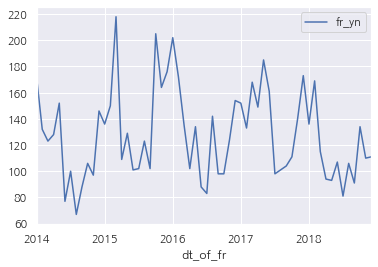

In [43]:
temp_df = pd.merge(df["dt_of_fr"],y_train, 
                   left_index=True, 
                   right_index=True).set_index("dt_of_fr")
temp_df.resample("M").sum().plot()

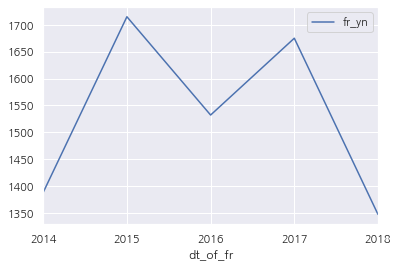

In [44]:
temp_df.resample("Y").sum().plot()

In [46]:
temp_df["month"] = temp_df.index.month
temp_df["dayofweek"] = temp_df.index.dayofweek
temp_df["day"] = temp_df.index.day
temp_df["hour"] = temp_df.index.hour

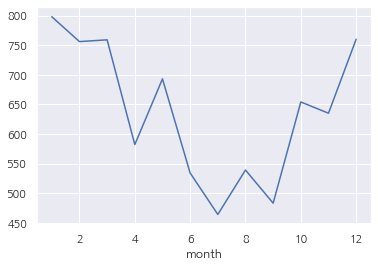

In [47]:
temp_df.groupby("month")["fr_yn"].sum().plot()

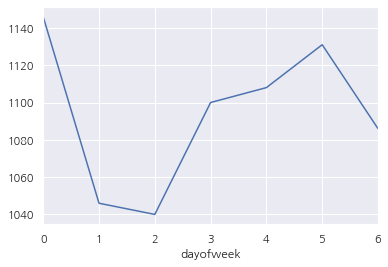

In [18]:
temp_df.groupby("dayofweek")["fr_yn"].sum().plot()

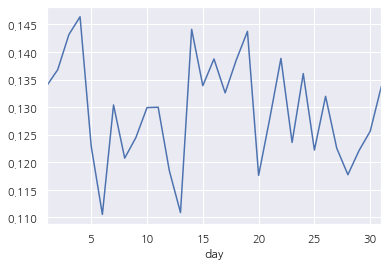

In [19]:
temp_df.groupby("day")["fr_yn"].mean().plot()

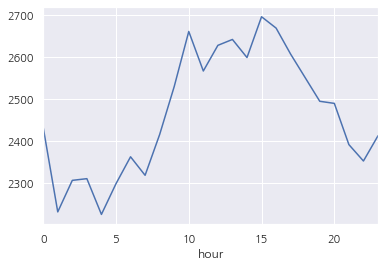

In [20]:
temp_df.groupby("hour")["fr_yn"].count().plot()

lnd_ar


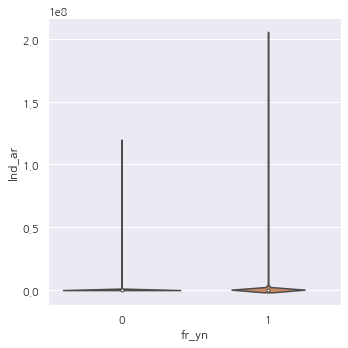

tmprtr


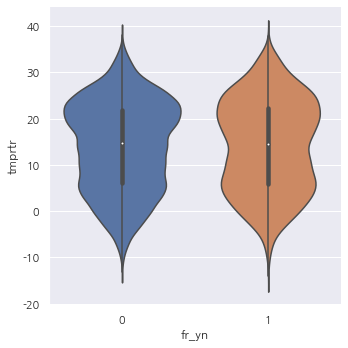

prcpttn


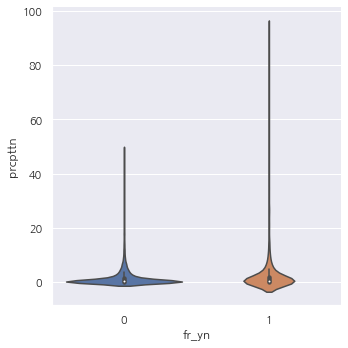

wnd_spd


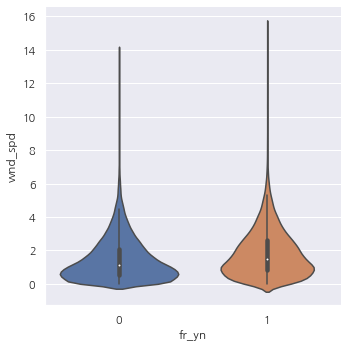

wnd_drctn


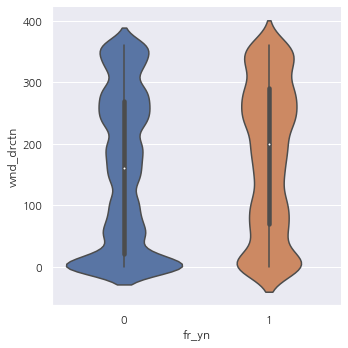

hmdt


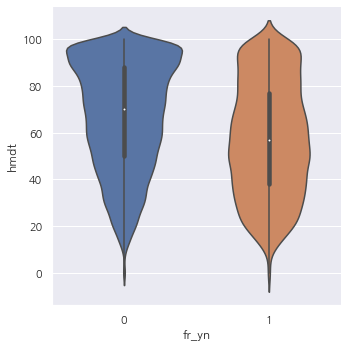

fr_sttn_dstnc


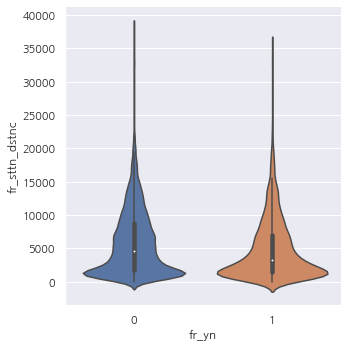

bldng_ar_prc


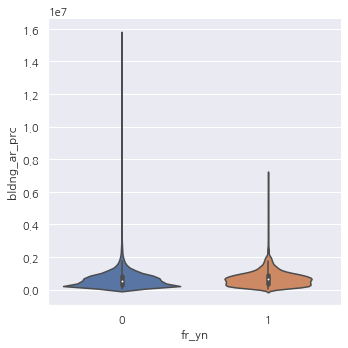

fr_wthr_fclt_dstnc


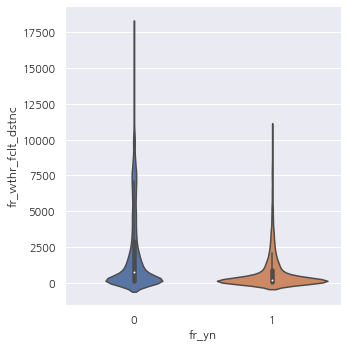

fr_mn_cnt


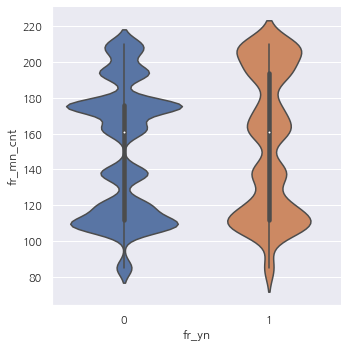

cctv_dstnc


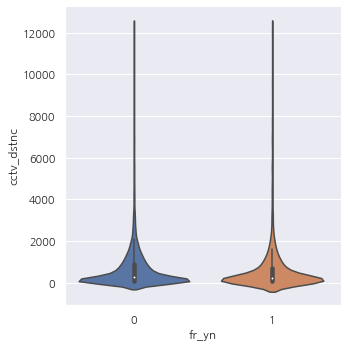

tbc_rtl_str_dstnc


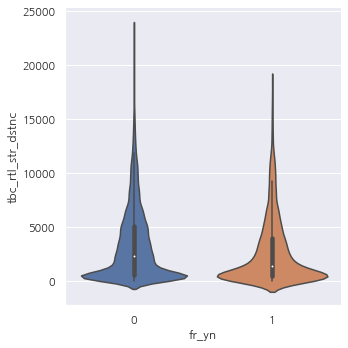

sft_emrgnc_bll_dstnc


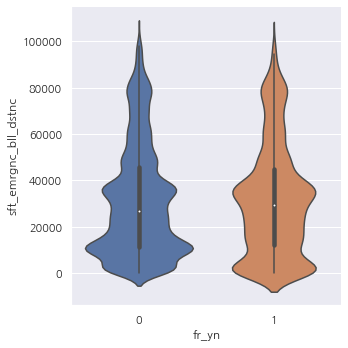

ahsm_dstnc


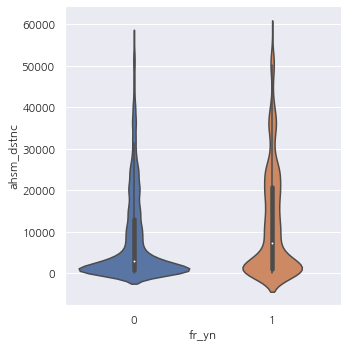

no_tbc_zn_dstnc


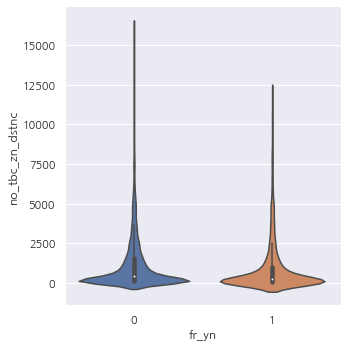

bldng_ar


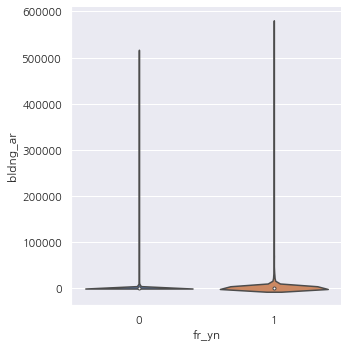

ttl_ar


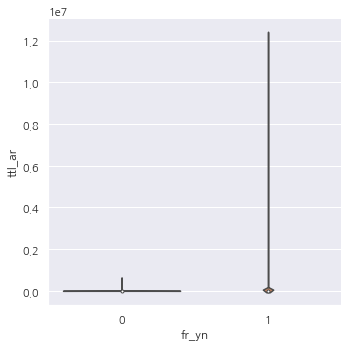

In [21]:
for col in float_cols:
    temp_df = pd.merge(df[col],y_train, left_index=True, right_index=True)
    print(col)
    g = sns.catplot(x="fr_yn", y=col, data=temp_df, kind="violin")
    plt.show()

bldng_us


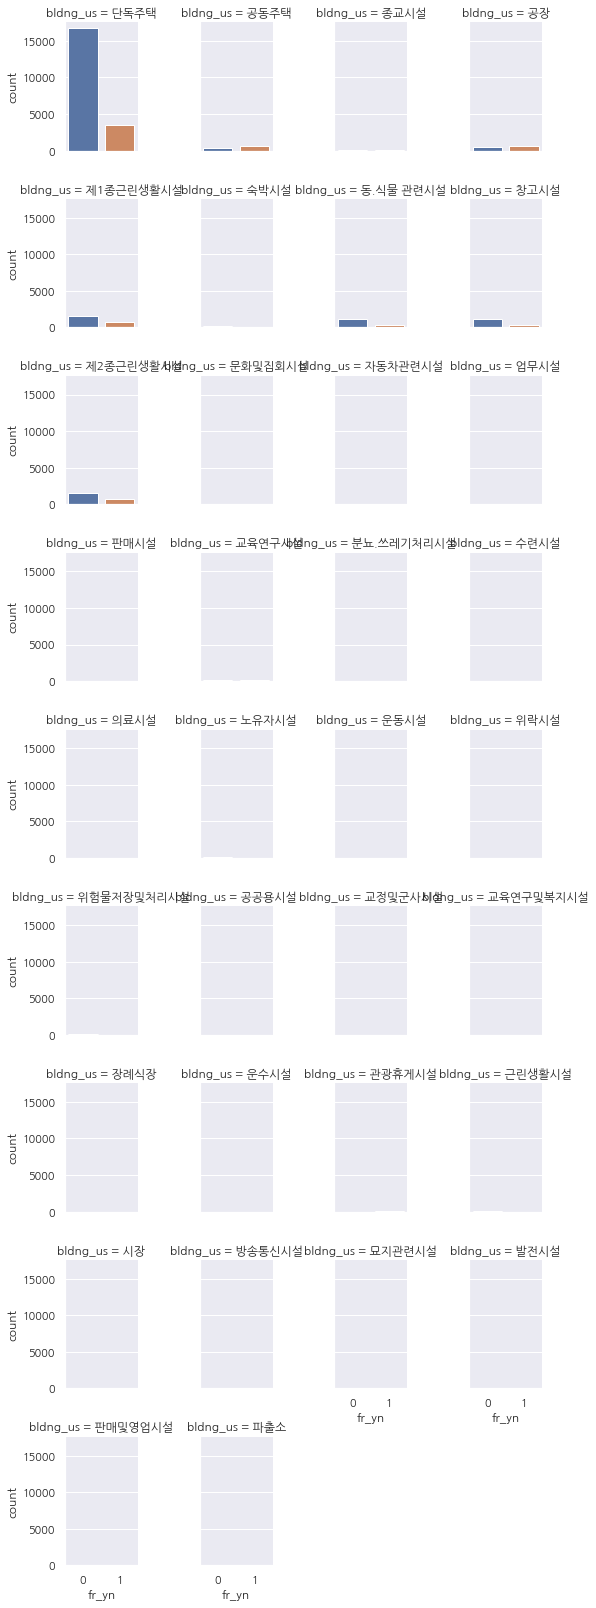

bldng_archtctr


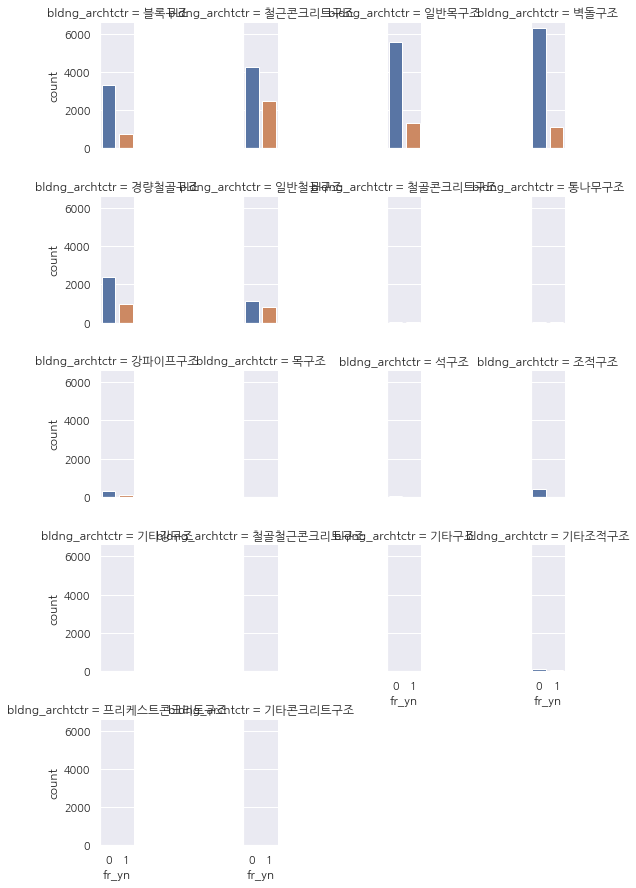

bldng_us_clssfctn


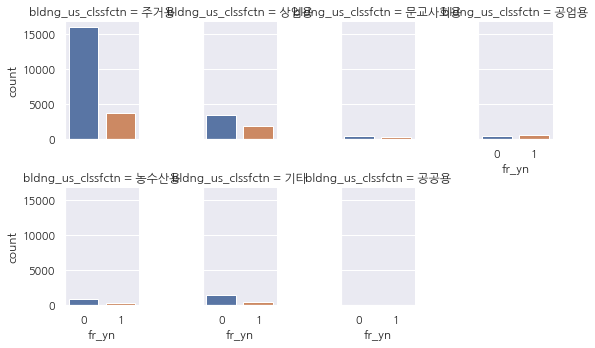

jmk


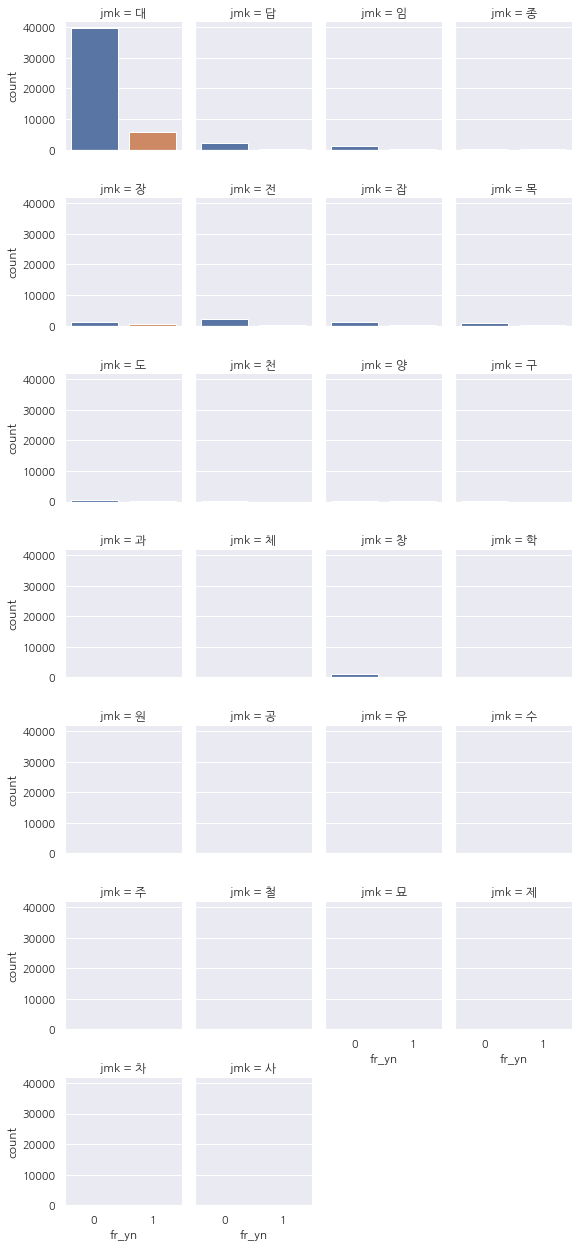

rgnl_ar_nm


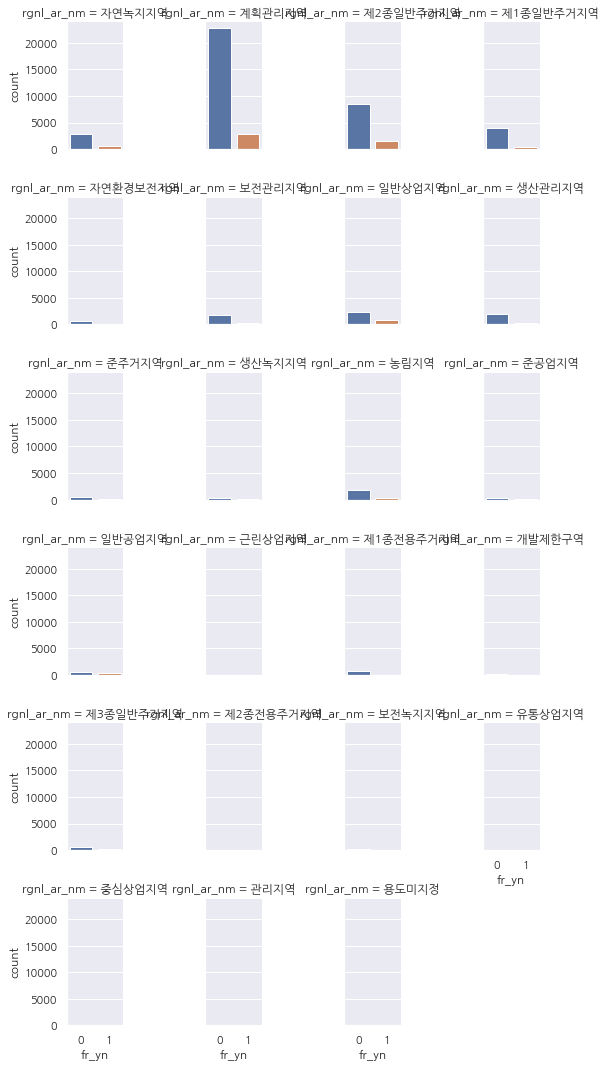

rgnl_ar_nm2


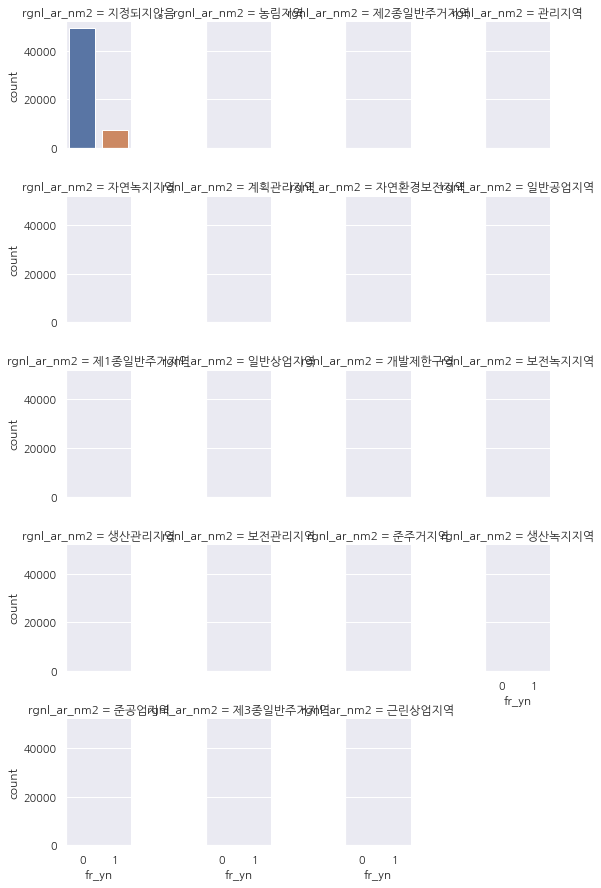

lnd_us_sttn_nm


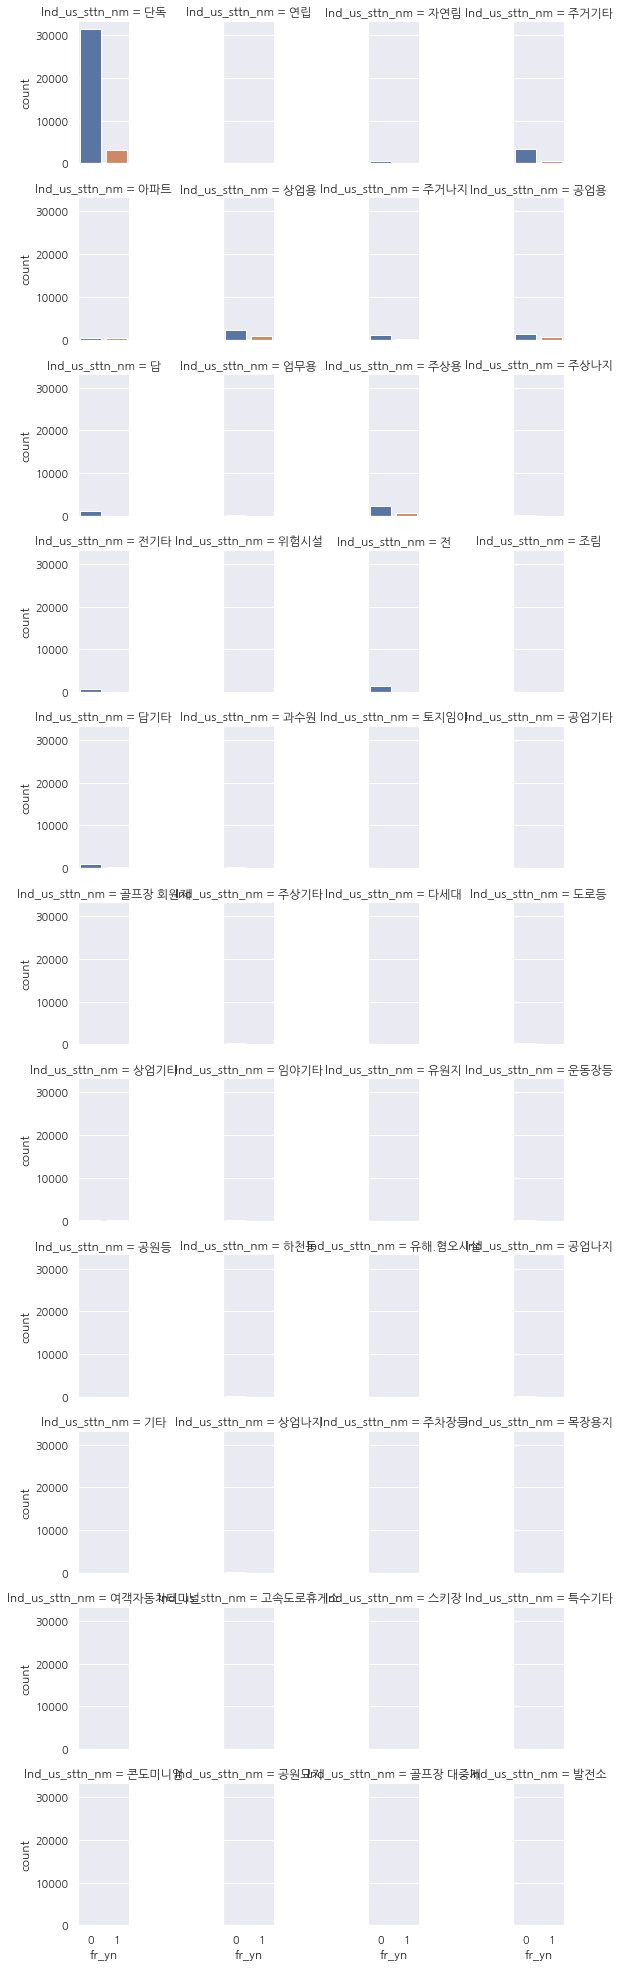

rd_sd_nm


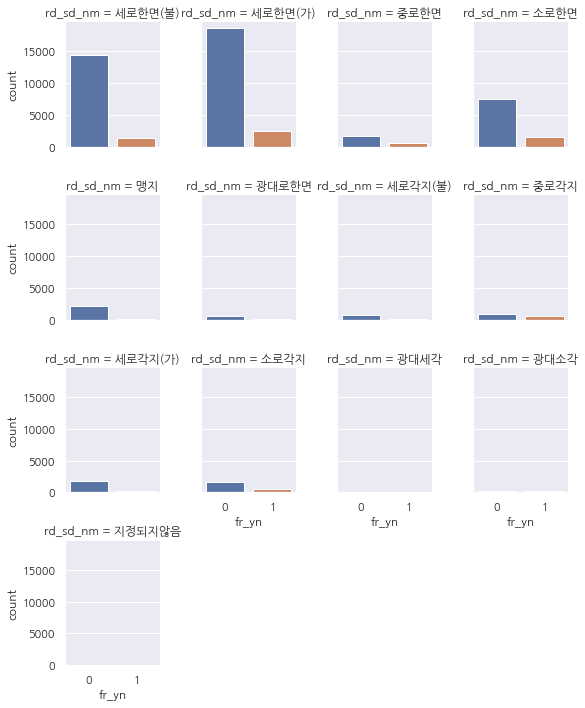

trgt_crtr


C:\Users\sc82choi\Miniconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


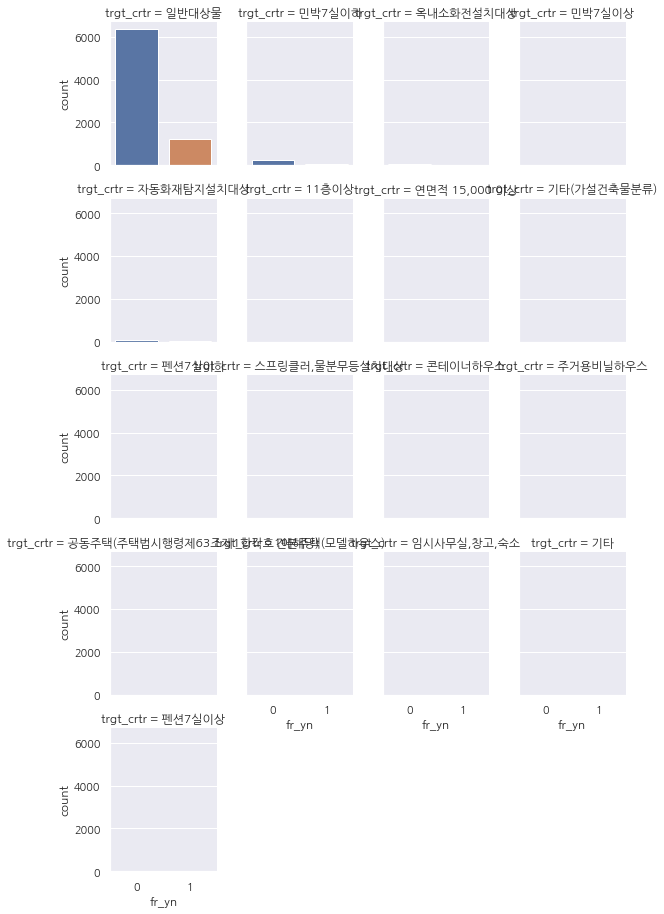

In [22]:
for col in category_cols:
    temp_df = pd.merge(df[col],y_train, left_index=True, right_index=True)
    print(col)
    g = sns.catplot("fr_yn", col=col, col_wrap=4,
                data=temp_df[temp_df[col].notnull()],
            kind="count", height=2.5, aspect=.8)
    plt.show()
    


fr_fghtng_fclt_spcl_css_5_yn


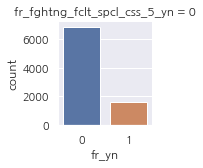

fr_fghtng_fclt_spcl_css_6_yn


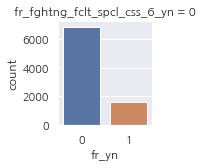

us_yn


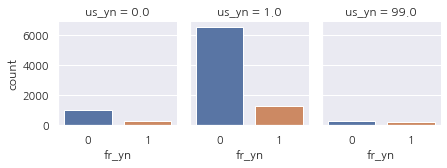

dngrs_thng_yn


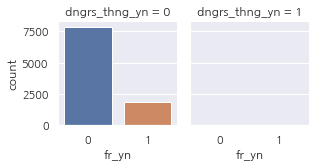

slf_fr_brgd_yn


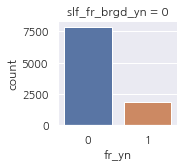

blk_dngrs_thng_mnfctr_yn


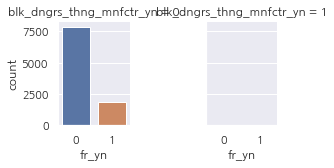

cltrl_hrtg_yn


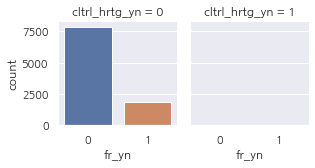

mlt_us_yn


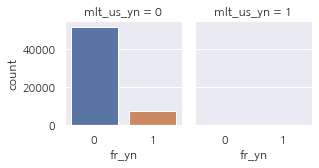

In [23]:
for col in boolen_cols:
    temp_df = pd.merge(df[col],y_train, left_index=True, right_index=True)
    print(col)
    g = sns.catplot("fr_yn", col=col, col_wrap=4,
                data=temp_df[temp_df[col].notnull()],
            kind="count", height=2.5, aspect=.8)
    plt.show()
    


In [50]:
for col in float_cols:
    print(col)
    g = sns.distplot(df[df[col].notnull()][col])
    plt.show()

NameError: name 'float_cols' is not defined

In [25]:
df["dt_of_fr"]

0       2017-10-20 05:54:00
1       2018-09-30 08:26:00
2       2016-10-30 14:57:00
3       2016-06-14 05:23:00
4       2018-04-22 05:38:00
                ...        
66092   2017-11-09 17:00:00
66093   2014-03-25 16:52:00
66094   2017-07-07 14:12:00
66095   2018-12-09 08:13:00
66096   2018-11-22 04:31:00
Name: dt_of_fr, Length: 66097, dtype: datetime64[ns]

In [ ]:
def split_date_str(x):
    return x+"01"

In [52]:
df["dt_of_fr"][0]

Timestamp('2017-10-20 05:54:00')

In [65]:
df_temp = gas_enery_df.unstack().swaplevel().reset_index().sort_values("level_0")
df_temp[df_temp["level_0"] == 0].sort_values("level_1").loc[:2974365][0].sum()




0.0

In [28]:
gas_enery_unstack_df = gas_enery_df.unstack().swaplevel().reset_index()
gas_enery_date = gas_enery_unstack_df["level_1"].str.split("_", expand=True)[3]
gas_enery_date = pd.to_datetime(gas_enery_date.map(split_date_str), format="%Y%m%d")

In [29]:
gas_enery_info_df = pd.merge(gas_enery_unstack_df[["level_0", 0]], gas_enery_date, left_index=True, right_index=True)
gas_enery_info_df = gas_enery_info_df.rename(
    columns={"level_0":"index", 0:"value", 3:"date"}
)


In [ ]:
gas_enery_info_df["dt_of_fr"] = gas_enery_info_df["index"].transform(df["dt_of_fr"])

In [ ]:
gas_enery_info_df